# Sevilla secciones + bicis

In [4]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import pandas as pd
import json
import ast

# Vamos con las secciones:

In [178]:
geo_json = r"DATA/SeccCensales_2014_2015.geojson"

with open (geo_json) as geo_file:
    sev_secc = json.load(geo_file)

In [411]:
m = folium.Map(location=[37.39161,-5.97640], zoom_start=12, tiles='CartoDB positron')

folium.GeoJson(sev_secc).add_to(m)

m;

## si exploramos el propio geojson...

In [264]:
sev_secc.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [270]:
sev_secc["crs"]["properties"]["name"]

'urn:ogc:def:crs:OGC:1.3:CRS84'

In [182]:
len(sev_secc["features"])

606

In [184]:
sev_secc["features"][44]["properties"]

{'FID': 45,
 'Secc_6D': 64,
 'Secc_11D': 34,
 'SUP': 0.03975327715,
 'Perimetro': 1036.734008,
 'Distri_6D': 3,
 'Distri_11D': 8,
 'Barrio': 'SAN PABLO D Y E',
 'HabitTotal': 992,
 'FECHA': 0,
 'ACTUACION': ' ',
 'SECCION': '8-34',
 'OBSERVACIO': ' ',
 'ESTADO': 0,
 'HabitHombr': 469,
 'HabitMujer': 523,
 'USOS': ' ',
 'P_15_0_18': 173.0,
 'P_15_18_64': 628.0,
 'P_15_64': 204.0,
 'P_15_H': 464.0,
 'P_15_M': 541.0,
 'P_15_T': 1005.0,
 'CreationDate': '2015/12/01 13:16:02',
 'Creator': 'Ayto.Sevilla',
 'EditDate': '2015/12/01 13:16:02',
 'Editor': 'Ayto.Sevilla',
 'SHAPE_Length': 0.01053752176911604,
 'SHAPE_Area': 4.041759836990189e-06}

In [191]:
FIDs=[elem["properties"]["FID"] for elem in sev_secc["features"]]
Habitantes=[elem["properties"]["HabitTotal"] for elem in sev_secc["features"]]
Superficies=[elem["properties"]["SUP"] for elem in sev_secc["features"]]

In [194]:
df=pd.DataFrame(FIDs,columns=["FID"])
df["Habitantes"]=Habitantes
df["Superficie"]=Superficies
df["Densidad"]=df["Habitantes"]/df["Superficie"]

In [195]:
df

,FID,Habitantes,Superficie,Densidad
0,1,1556,0.046335,33581.774618
1,2,1240,0.046264,26802.613847
2,3,687,0.046098,14902.948970
3,4,1397,0.045820,30488.972395
4,5,1767,0.045795,38585.242243
...,...,...,...,...
601,602,1632,10.627216,153.567969
602,603,1632,10.627216,153.567969
603,604,1632,10.627216,153.567969
604,605,0,0.251891,0.000000


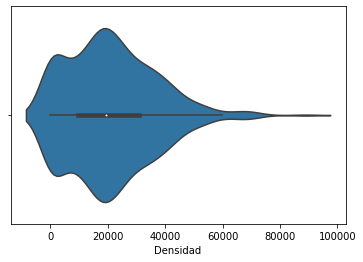

In [414]:
import seaborn as sns
ax = sns.violinplot(x=df["Densidad"])

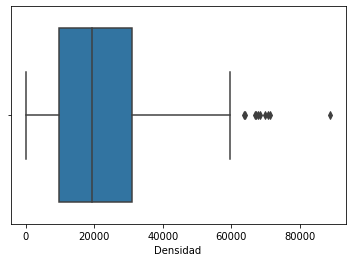

In [415]:
ax = sns.boxplot(x=df["Densidad"])

In [418]:
secc_cloro = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");

secc_cloro.choropleth(
    geo_data = sev_secc,
    data = df, 
    columns = ["FID", "Densidad"],
    key_on = "feature.properties.FID", 
    fill_color = "BuPu",
    fill_opacity = 0.4,
    line_opacity = 1,
    legend_name = "Valores de DENSIDAD",
    smooth_factor = 1
);

secc_cloro

## intentamos centroides:

In [445]:
gdf = gpd.read_file("DATA/SeccCensales_2014_2015.geojson")

In [446]:
gdf.sample()

,FID,Secc_6D,Secc_11D,SUP,Perimetro,Distri_6D,Distri_11D,Barrio,HabitTotal,FECHA,...,P_15_H,P_15_M,P_15_T,CreationDate,Creator,EditDate,Editor,SHAPE_Length,SHAPE_Area,geometry
270,271,51,51,0.083098,1607.117706,1,1,SAN BARTOLOME,1572,20051130,...,696.0,862.0,1558.0,2015-12-01T13:16:02,Ayto.Sevilla,2015-12-01T13:16:02,Ayto.Sevilla,0.016161,0.000008,"MULTIPOLYGON (((-5.98448 37.38919, -5.98474 37..."


In [447]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [448]:
gdf = gdf.to_crs(epsg=2062)
gdf['centroid'] = gdf.centroid

In [449]:
gdf.sample()

,FID,Secc_6D,Secc_11D,SUP,Perimetro,Distri_6D,Distri_11D,Barrio,HabitTotal,FECHA,...,P_15_M,P_15_T,CreationDate,Creator,EditDate,Editor,SHAPE_Length,SHAPE_Area,geometry,centroid
413,414,57,57,0.071949,1150.486176,5,5,TABLADILLA-LA ESTRELLA,1246,20080411,...,640.0,1214.0,2015-12-01T13:16:02,Ayto.Sevilla,2015-12-01T13:16:02,Ayto.Sevilla,0.012065,0.000007,"MULTIPOLYGON (((396731.755 310537.738, 396726....",POINT (396871.350 310677.930)


In [450]:
gdf = gdf.to_crs(epsg=4326)
gdf['centroid'] = gdf['centroid'].to_crs(epsg=4326)

In [451]:
gdf.sample()

,FID,Secc_6D,Secc_11D,SUP,Perimetro,Distri_6D,Distri_11D,Barrio,HabitTotal,FECHA,...,P_15_M,P_15_T,CreationDate,Creator,EditDate,Editor,SHAPE_Length,SHAPE_Area,geometry,centroid
427,428,64,3,0.069191,1138.177888,2,7,LAS NACIONES-PARQUE ATLANTICO-LAS DALIAS,1743,0,...,924.0,1740.0,2015-12-01T13:16:02,Ayto.Sevilla,2015-12-01T13:16:02,Ayto.Sevilla,0.011877,0.000007,"MULTIPOLYGON (((-5.96453 37.40526, -5.96620 37...",POINT (-5.96683 37.40548)


In [452]:
gdf['centroid_lat'] = gdf['centroid'].y
gdf['centroid_lon'] = gdf['centroid'].x

In [453]:
gdf.sample()

,FID,Secc_6D,Secc_11D,SUP,Perimetro,Distri_6D,Distri_11D,Barrio,HabitTotal,FECHA,...,CreationDate,Creator,EditDate,Editor,SHAPE_Length,SHAPE_Area,geometry,centroid,centroid_lat,centroid_lon
135,136,45,45,0.035941,940.111231,5,5,POLIGONO SUR,903,0,...,2015-12-01T13:16:02,Ayto.Sevilla,2015-12-01T13:16:02,Ayto.Sevilla,0.009737,0.000004,"MULTIPOLYGON (((-5.95928 37.36081, -5.95972 37...",POINT (-5.96119 37.35991),37.359914,-5.961189


In [454]:
centroides = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");

for _, r in gdf.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon]).add_to(centroides)
    
centroides;

## bubble map:

In [421]:
bubble = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");

for i in range(len(gdf)):
   folium.Circle(
      location=[gdf.iloc[i]['centroid_lat'], gdf.iloc[i]['centroid_lon']],
      popup=gdf.iloc[i]['HabitTotal'],
      radius=float(gdf.iloc[i]['HabitTotal'])/10,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(bubble)

bubble;

## heatmap de la población:

In [381]:
gdf.sample()

,FID,Secc_6D,Secc_11D,SUP,Perimetro,Distri_6D,Distri_11D,Barrio,HabitTotal,FECHA,...,CreationDate,Creator,EditDate,Editor,SHAPE_Length,SHAPE_Area,geometry,centroid,centroid_lat,centroid_lon
251,252,60,23,0.086826,1266.449205,4,9,TORREBLANCA,1451,0,...,2015-12-01T13:16:02,Ayto.Sevilla,2015-12-01T13:16:02,Ayto.Sevilla,0.012792,0.000009,"MULTIPOLYGON (((-5.90216 37.38518, -5.90240 37...",POINT (-5.90410 37.38361),37.383607,-5.904101


In [422]:
centroid_locations = list(zip(gdf["centroid_lat"], gdf["centroid_lon"]))

In [424]:
heat_centroides = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");
HeatMap(centroid_locations,radius=20,blur=30).add_to(heat_centroides);
heat_centroides;

## scatterplot...

In [428]:
import plotly.express as px

fig = px.scatter_mapbox(gdf,
                        lat=gdf.centroid_lat,
                        lon=gdf.centroid_lon,
                        size="HabitTotal",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

fig.show()

# Vamos con las bicis:

In [429]:
geo_json_bicis = r"DATA/SEVICI.geojson"

with open (geo_json_bicis) as geo_file:
    sev_SEVICI = json.load(geo_file)

In [431]:
bicis = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");
folium.GeoJson(sev_SEVICI).add_to(bicis);
bicis;

## o con el metro:

In [432]:
geo_json_metro = r"DATA/sevilla-metro-stations.geojson"

with open (geo_json_metro) as geo_file:
    sev_METRO = json.load(geo_file)

In [442]:
metro = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");
folium.GeoJson(sev_METRO).add_to(metro);
metro;

## y autobuses:

In [434]:
df_buses = pd.read_csv("DATA/autobuses.csv")

In [436]:
df_buses.sample()

,LÍNEA,NOMBRE LÍNEA,DESTINO SECCIÓN,NODO,NOMBRE PARADA,LATITUD_WS84,LONGITUD_WS84
664,22,Prado-Sevilla Este,PRADO DE S.SEBASTIAN,735,Avenida de Las Ciencias (Ulises),37.395714,-5.922897


In [439]:
buses_locations = list(zip(df_buses["LATITUD_WS84"], df_buses["LONGITUD_WS84"]))

In [440]:
cluster_buses = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");

marker_cluster = MarkerCluster(buses_locations)
marker_cluster.add_to(cluster_buses)

cluster_buses

## probamos el heatmap para las bicis:

In [233]:
bicis_gdf = gpd.read_file("DATA/SEVICI.geojson")

In [393]:
bicis_gdf.shape

(260, 13)

In [385]:
bicis_gdf.sample()

,FID,id_estacio,Direccion,Aproximaci,Lat_Y,Lon_X,CreationDate,Creator,EditDate,Editor,geometry,x,y
240,241,241.0,Plaza Nueva,Calle Mendez Núñez,37.388844,-5.996077,2014-10-04T21:21:32,Ayto.Sevilla,2014-10-04T21:21:32,Ayto.Sevilla,POINT (-5.99608 37.38884),-5.996077,37.388844


In [235]:
bicis_gdf["x"]=bicis_gdf["geometry"].x
bicis_gdf["y"]=bicis_gdf["geometry"].y

In [236]:
bicis_gdf.sample()

,FID,id_estacio,Direccion,Aproximaci,Lat_Y,Lon_X,CreationDate,Creator,EditDate,Editor,geometry,x,y
135,136,75.0,Plaza San Francisco,Calle Hernando Colón,37.388126,-5.993839,2014-10-04T21:21:32,Ayto.Sevilla,2014-10-04T21:21:32,Ayto.Sevilla,POINT (-5.99384 37.38813),-5.993839,37.388126


In [237]:
locations = list(zip(bicis_gdf["y"], bicis_gdf["x"]))

In [402]:
mapa = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");
HeatMap(locations,radius=20,blur=30).add_to(mapa);
mapa;

In [403]:
bicis = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");
marker_cluster = MarkerCluster(locations)
marker_cluster.add_to(bicis)
bicis

## Contamos cuántas bicis hay en cada polígono...

In [465]:
# Read the data.
polygons = gdf
points = bicis_gdf

# Make a copy because I'm going to drop points as I
# assign them to polys, to speed up subsequent search.
pts = points.copy() 

# We're going to keep a list of how many points we find.
pts_in_polys = []

# Loop over polygons with index i.
for i, poly in polygons.iterrows():

    # Keep a list of points in this poly
    pts_in_this_poly = []

    # Now loop over all points with index j.
    for j, pt in pts.iterrows():
        if poly.geometry.contains(pt.geometry):
            # Then it's a hit! Add it to the list,
            # and drop it so we have less hunting.
            pts_in_this_poly.append(pt.geometry)
            pts = pts.drop([j])

    # We could do all sorts, like grab a property of the
    # points, but let's just append the number of them.
    pts_in_polys.append(len(pts_in_this_poly))

# Add the number of points for each poly to the dataframe.
df['numero de SEVICIs'] = gpd.GeoSeries(pts_in_polys)

<ipython-input-465-8602bc644d45>:31: FutureWarning:

    You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.



## ...cuántos buses...

In [466]:
buses_gdf = gpd.GeoDataFrame(
    df_buses, geometry=gpd.points_from_xy(df_buses.LONGITUD_WS84, df_buses.LATITUD_WS84))

In [467]:
# Read the data.
polygons = gdf
points = buses_gdf

# Make a copy because I'm going to drop points as I
# assign them to polys, to speed up subsequent search.
pts = points.copy() 

# We're going to keep a list of how many points we find.
pts_in_polys = []

# Loop over polygons with index i.
for i, poly in polygons.iterrows():

    # Keep a list of points in this poly
    pts_in_this_poly = []

    # Now loop over all points with index j.
    for j, pt in pts.iterrows():
        if poly.geometry.contains(pt.geometry):
            # Then it's a hit! Add it to the list,
            # and drop it so we have less hunting.
            pts_in_this_poly.append(pt.geometry)
            pts = pts.drop([j])

    # We could do all sorts, like grab a property of the
    # points, but let's just append the number of them.
    pts_in_polys.append(len(pts_in_this_poly))

# Add the number of points for each poly to the dataframe.
df['numero de BUSES'] = gpd.GeoSeries(pts_in_polys)

<ipython-input-467-809f9755a322>:31: FutureWarning:

    You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.



## y cuántas estaciones de metro:

In [471]:
metro_gdf = gpd.read_file("DATA/sevilla-metro-stations.geojson")

In [472]:
polygons = gdf
points = metro_gdf

pts = points.copy() 

pts_in_polys = []

for i, poly in polygons.iterrows():

    pts_in_this_poly = []

    for j, pt in pts.iterrows():
        if poly.geometry.contains(pt.geometry):
            pts_in_this_poly.append(pt.geometry)
            pts = pts.drop([j])

    pts_in_polys.append(len(pts_in_this_poly))

df['numero de METRO'] = gpd.GeoSeries(pts_in_polys)

<ipython-input-472-d3bbb6dcd72f>:19: FutureWarning:

    You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.



In [473]:
df.head()

,FID,Habitantes,Superficie,Densidad,numero de SEVICIs,numero de BUSES,numero de METRO
0,1,1556,0.046335,33581.774618,1,4,0
1,2,1240,0.046264,26802.613847,1,3,0
2,3,687,0.046098,14902.948970,0,0,0
3,4,1397,0.045820,30488.972395,0,3,0
4,5,1767,0.045795,38585.242243,1,1,0


In [476]:
df["numero de SEVICIs"].value_counts()

0     416
1     152
2      27
3       4
5       3
4       3
15      1
Name: numero de SEVICIs, dtype: int64

In [477]:
df["numero de BUSES"].value_counts()

0     187
2      78
3      72
1      67
4      49
5      34
6      30
7      22
8      11
10      8
9       7
12      6
11      6
13      5
16      4
15      4
14      2
24      2
34      1
17      1
18      1
30      1
39      1
19      1
25      1
57      1
26      1
29      1
27      1
20      1
Name: numero de BUSES, dtype: int64

In [478]:
df["numero de METRO"].value_counts()

0    593
1     12
2      1
Name: numero de METRO, dtype: int64

## DualMaps:

In [ ]:
# DualMap accepts the same arguments as Map:
m = DualMap(location=(0, 0), tiles='cartodbpositron', zoom_start=5)
# Add the same marker to both maps:
Marker((0, 0)).add_to(m)
# The individual maps are attributes called `m1` and `m2`:
Marker((0, 1)).add_to(m.m1)
LayerControl().add_to(m)
m.save('map.html')

In [256]:
from folium.plugins import DualMap

In [400]:
m = DualMap(location=[37.3882,-5.9699], tiles='cartodbpositron', zoom_start=14)

HeatMap(locations,radius=25,blur=15).add_to(m.m1)
HeatMap(locations,radius=20,blur=30).add_to(m.m2)

m

In [482]:
centroid_locations[25]

(37.37424734570945, -5.954301018791969)

In [489]:
df_centroides = pd.DataFrame(centroid_locations,columns=["lat","lon"])

In [490]:
df_centroides.head(3)

,lat,lon
0,37.393622,-5.980967
1,37.399219,-5.961049
2,37.399933,-5.995171


In [494]:
pip install geopy

     |████████████████████████████████| 118 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [495]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [498]:
coords = df_centroides.to_numpy()

In [499]:
type(coords)

numpy.ndarray

In [485]:
metros=600

In [500]:
kms_per_radian = 6371.0088
epsilon = (metros/1000) / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 4
